In [8]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

## Lecture 15: Comparing Disgtributions ##

## Mendel and Pea Flowers ##

In [9]:
model = make_array(0.75, 0.25)

In [10]:
sample_proportions(929, model)

array([0.73627557, 0.26372443])

In [11]:
# statistic: distance between sample percent (of purple plants) and 75

abs(100 * sample_proportions(929, model).item(0) - 75)

2.8794402583422993

In [12]:
# Simulation

distances = make_array()

for i in np.arange(10000):
    new_distance = abs(100 * sample_proportions(929, model).item(0) - 75)
    distances = np.append(distances, new_distance)

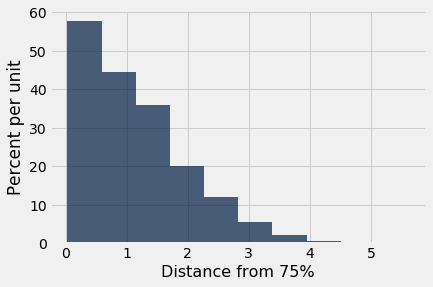

In [13]:
Table().with_column('Distance from 75%', distances).hist()

In [14]:
# 705 of Mendel's 929 plants were purple flowering

observed_distance =  abs(100*(705/929) - 75)
observed_distance

0.8880516684607045

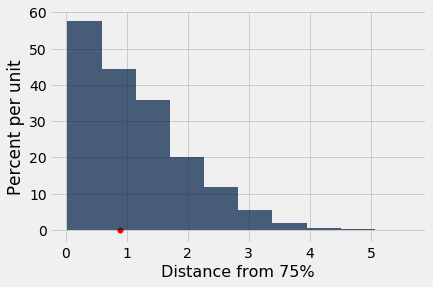

In [15]:
Table().with_column('Distance from 75%', distances).hist()
plots.scatter(observed_distance, 0, color='red', s=30);

## Alameda County Jury Panels ##

In [16]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


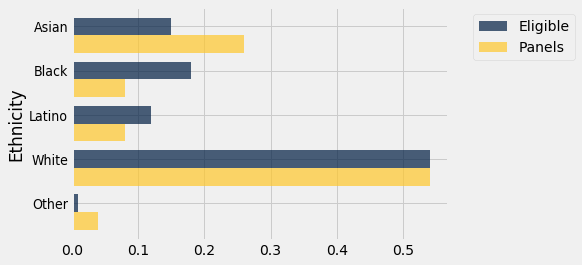

In [17]:
jury.barh('Ethnicity')

In [18]:
jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)

In [19]:
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [20]:
jury_with_diffs = jury_with_diffs.with_column(
    'Absolute Difference', np.abs(jury_with_diffs.column('Difference'))
)

In [21]:
jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.1,0.1
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0,0
Other,0.01,0.04,0.03,0.03


In [22]:
sum(jury_with_diffs.column('Absolute Difference'))

0.28

In [23]:
sum(jury_with_diffs.column('Absolute Difference')) / 2

0.14

In [24]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [25]:
total_variation_distance(jury.column('Eligible'), jury.column('Panels'))

0.14

In [26]:
eligible = jury.column('Eligible')

In [27]:
sample_distribution = sample_proportions(1453, eligible)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)

In [28]:
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian,0.15,0.26,0.140399
Black,0.18,0.08,0.17894
Latino,0.12,0.08,0.13214
White,0.54,0.54,0.546456
Other,0.01,0.04,0.00206469


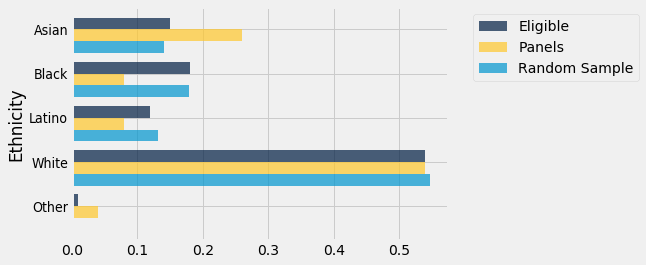

In [29]:
panels_and_sample.barh('Ethnicity')

In [30]:
total_variation_distance(panels_and_sample.column('Random Sample'), eligible)

0.018596008258774915

In [31]:
observed_tvd = total_variation_distance(jury.column('Panels'), eligible)
observed_tvd

0.14

In [32]:
sample_distribution = sample_proportions(1453, eligible)
total_variation_distance(sample_distribution, eligible)

0.02828630419821062

In [33]:
tvds = make_array()

for i in np.arange(10000):
    sample_distribution = sample_proportions(1453, eligible)
    new_tvd = total_variation_distance(sample_distribution, eligible)
    tvds = np.append(tvds, new_tvd)
    


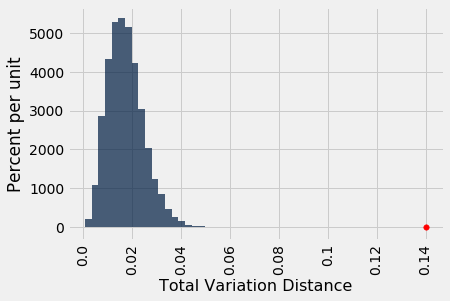

In [40]:
Table().with_column('Total Variation Distance', tvds).hist(bins = 20)
plots.scatter(observed_tvd, 0, color='red', s=30);
plots.xticks(np.arange(0,0.14,0.02), np.arange(0,0.14,0.02));